# 1. Описание данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# users = pd.read_csv('telecom_users.csv')
# users = users.drop(columns='Unnamed: 0')

from google.colab import files
upload = files.upload()

import io

data = io.BytesIO(upload['telecom_users.csv'])
users = pd.read_csv(data)
users.head()


Saving telecom_users.csv to telecom_users (10).csv


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
users.duplicated().sum()

0

In [ ]:
users.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Пропущенные значения и дупликаты отсутствуют.

# 2. Исследование зависимостей и формулирование гипотез

Попробуем исследовать зависимости по тепловой карте.
Для этого приведем данные к общему виду.

In [ ]:
users['PaperlessBilling'] = users['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)
users['gender'] = users['gender'].apply(lambda x: 1 if x == 'Male' else 0)
users['Churn'] = users['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
users['Partner'] = users['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
users['Dependents'] = users['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
users['PhoneService'] = users['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)
users['MultipleLines'] = users['MultipleLines'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
cat_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'Contract', 'PaymentMethod']

In [ ]:
num_features = pd.get_dummies(users[cat_features])
num_features 

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
5982,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
5983,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
5984,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0


In [ ]:
users['TotalCharges'] = users['TotalCharges'].replace(' ', 0)
users['TotalCharges'] = users['TotalCharges'].astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaled = std.fit_transform(users['tenure'].values.reshape(-1, 1))
users['tenure'] = scaled

scaled2 = std.fit_transform(users['MonthlyCharges'].values.reshape(-1, 1))
users['MonthlyCharges'] = scaled2

scaled3 = std.fit_transform(users['TotalCharges'].values.reshape(-1, 1))
users['TotalCharges'] = scaled3

In [ ]:
original_features = users[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn', 'PaperlessBilling', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']]
original_features

,TotalCharges,MonthlyCharges,tenure,Churn,PaperlessBilling,gender,Partner,Dependents,PhoneService,MultipleLines
0,-0.246076,-1.351686,1.612576,0,0,1,1,1,1,1
1,0.738345,0.775360,0.470387,0,1,0,0,0,1,0
2,0.253138,0.336999,0.225633,1,1,0,1,0,1,1
3,-0.904022,-0.295635,-1.161310,0,1,1,0,0,1,0
4,-0.956353,-0.376997,-1.242895,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5981,-0.967127,1.002843,-1.283688,1,1,1,1,0,1,0
5982,-0.042182,0.873327,-0.386254,0,1,0,1,1,1,1
5983,-0.874316,-1.449653,-0.834971,0,1,1,1,1,1,0
5984,-0.481128,1.150623,-0.834971,1,1,1,0,0,1,1


In [ ]:
users2 = pd.concat([num_features, original_features], axis=1, join='inner')
users2

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,MonthlyCharges,tenure,Churn,PaperlessBilling,gender,Partner,Dependents,PhoneService,MultipleLines
0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,-0.246076,-1.351686,1.612576,0,0,1,1,1,1,1
1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0.738345,0.775360,0.470387,0,1,0,0,0,1,0
2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0.253138,0.336999,0.225633,1,1,0,1,0,1,1
3,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,-0.904022,-0.295635,-1.161310,0,1,1,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-0.956353,-0.376997,-1.242895,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,-0.967127,1.002843,-1.283688,1,1,1,1,0,1,0
5982,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,-0.042182,0.873327,-0.386254,0,1,0,1,1,1,1
5983,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,-0.874316,-1.449653,-0.834971,0,1,1,1,1,1,0
5984,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,-0.481128,1.150623,-0.834971,1,1,1,0,0,1,1


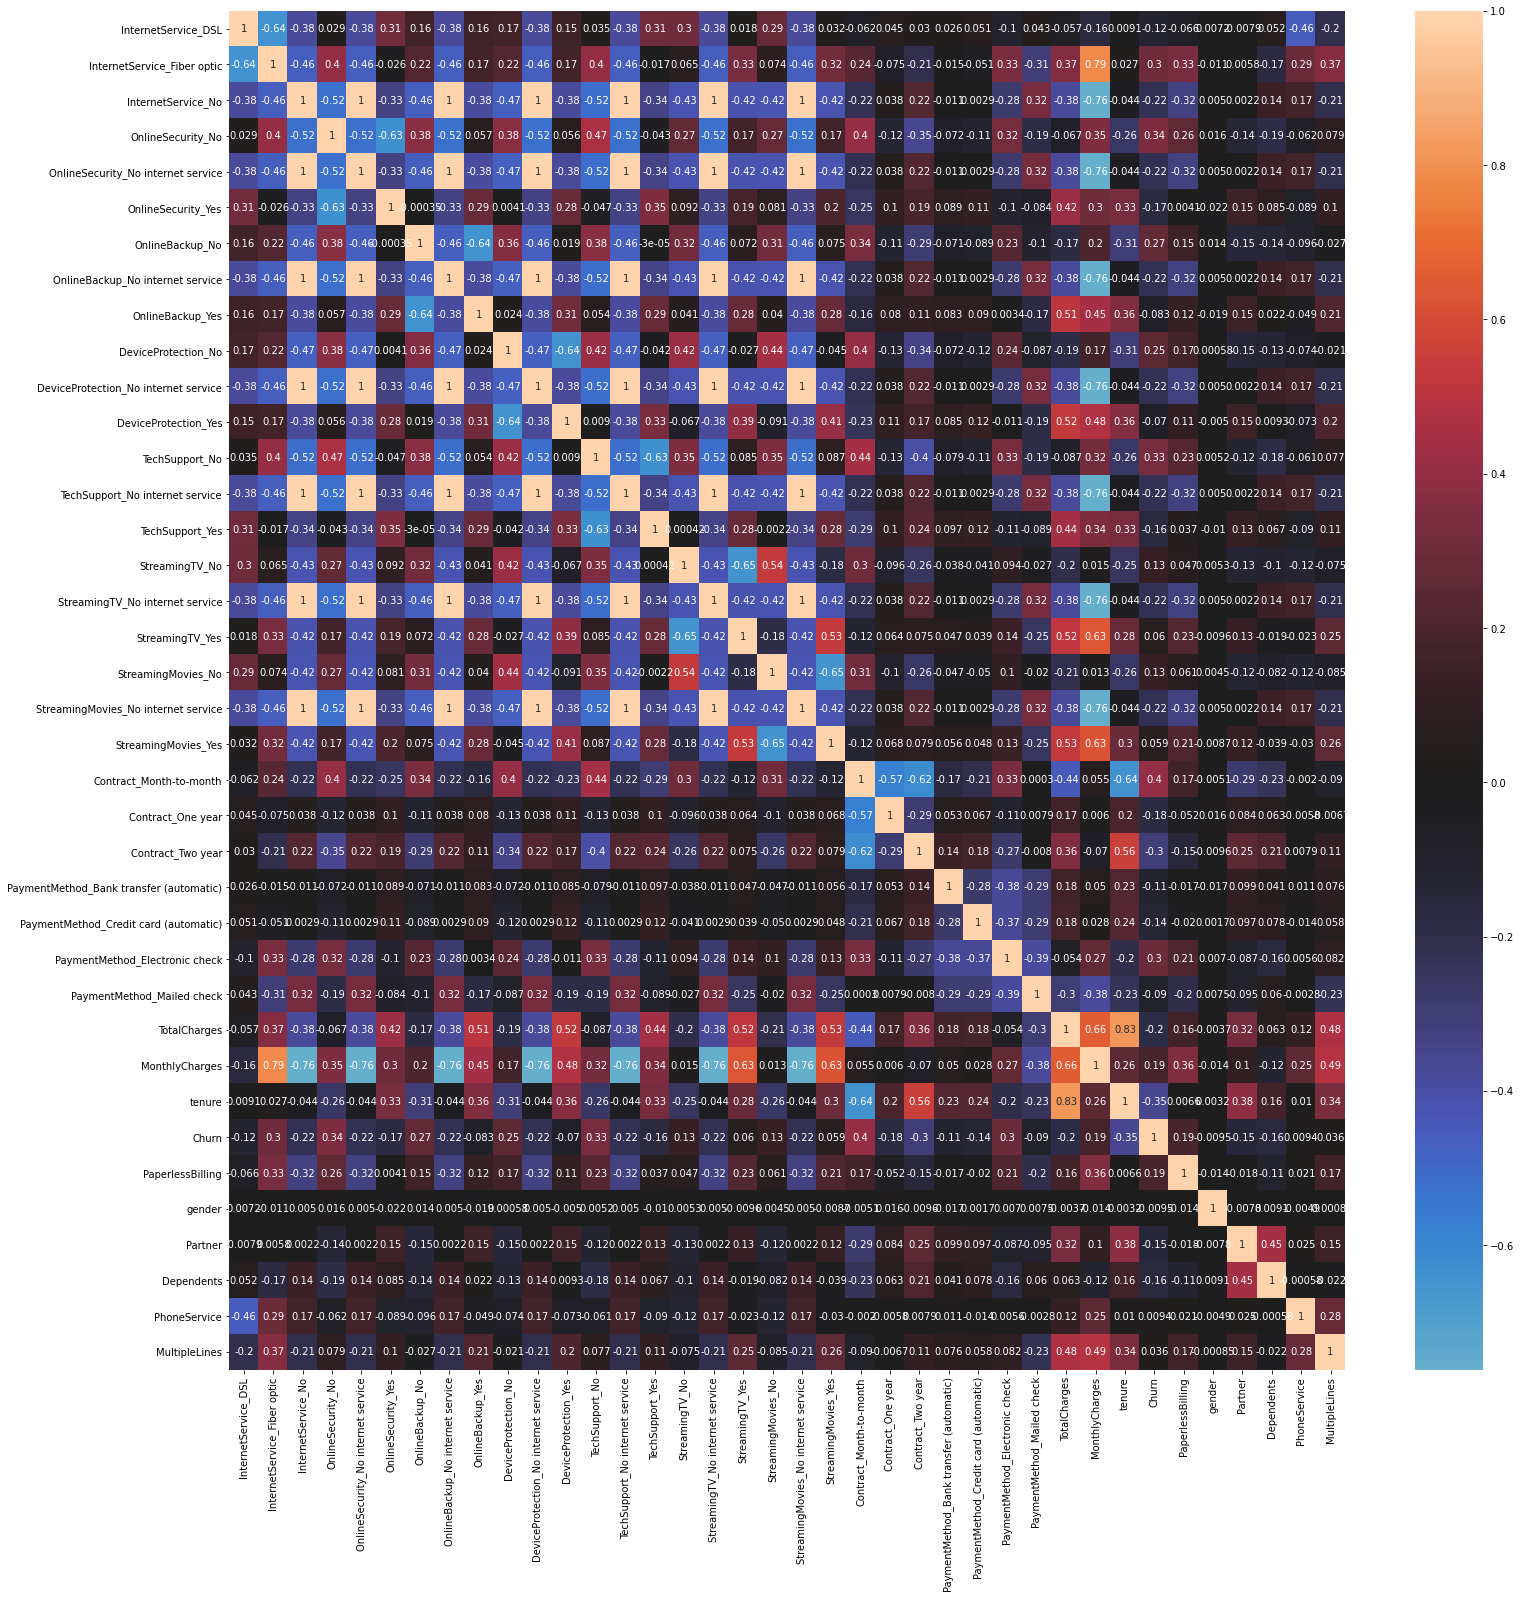

In [ ]:
corr_m = users2.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_m, center=0, annot=True)

По тепловой карте выделяются следующие зависимости:

1. Зависимость tenure от TotalCharges (что логично - чем дольше пользуешься услугами, тем больше денег тратишь).
2. Зависимость Fiber optic от MonthlyCharges (абон плата с интернетом выше).
3. Зависимость MonthlyCharges от TotalCharges (больше платишь в месяц - больше общие затраты).
4. Зависимость TotalCharges от OnlineBackup, DeviceProtection (больше подключенных услуг - больше общие затраты).
5. Обратная ависимость tenure от Contract (клиенты без месячного договора пользуются услугами дольше).

Целевая переменная не имеет ни одной сильной корреляции.

# 3. Построение моделей для прогнозирования оттока

Имеем задачу бинарной классификации поэтому для ее решения берем возьмем пару стандартных методов (SVM и LinearRegression) и пару ансамблевых (RandomTreeClassifier и XGBoost), изученных на курсе, и выберем из них лучший. Так как ушедших в отток явно меньше, чем оставшихся, то применять метрику accuracy будет некорректно. За главные метрики возьмем roc_auc и recall, т.к. цена верного предсказания ухода намного выше, чем верное предсказание продолжения отношений с клиентом.

In [ ]:
cleardf = users2

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

target = cleardf.Churn.values
data = cleardf.drop('Churn', axis = 1).values

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(data, target,
                                                                    random_state=17, test_size=.2)

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=17)

svc_model = svc.fit(train_data, train_target)
pred_svc = svc_model.predict(test_data)

print('recall:', recall_score(test_target, pred_svc), 'roc_auc:', roc_auc_score(test_target, pred_svc),
     'accuracy:', accuracy_score(test_target, pred_svc), 'f1:', f1_score(test_target, pred_svc))

recall: 0.47619047619047616 roc_auc: 0.6967588847543548 accuracy: 0.8013355592654424 f1: 0.5576208178438662


Модель показывает довольно низкие результаты. Попробуем подобрать веса так, чтобы модель имела оптимальную точность.

In [ ]:
svc = SVC(random_state=17, class_weight={0:1,1:3})

svc_model = svc.fit(train_data, train_target)
pred_svc = svc_model.predict(test_data)

print('recall:', recall_score(test_target, pred_svc), 'roc_auc:', roc_auc_score(test_target, pred_svc),
     'accuracy:', accuracy_score(test_target, pred_svc), 'f1:', f1_score(test_target, pred_svc))

recall: 0.8126984126984127 roc_auc: 0.7466663071419584 accuracy: 0.7153589315525877 f1: 0.6002344665885111


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=17)

lr_model = lr.fit(train_data, train_target)
pred_lr = lr_model.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

recall: 0.5333333333333333 roc_auc: 0.7168365420913552 accuracy: 0.8038397328881469 f1: 0.5884413309982487


In [ ]:
lr = LogisticRegression(random_state=17, class_weight={0:1,1:3})

lr_model = lr.fit(train_data, train_target)
pred_lr = lr_model.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

recall: 0.7968253968253968 roc_auc: 0.748922324686764 accuracy: 0.7262103505843072 f1: 0.6048192771084338


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight={0: 1, 1: 3}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

Попробую настроить гиперпараметры:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
distributions = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], penalty=['l1','l2', 'elasticnet'], C=np.arange(1, 1000, 1))
rcv = RandomizedSearchCV(lr, distributions, random_state=17)
search2 = rcv.fit(train_data, train_target)
search2.best_params_

{'C': 636, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
pred_lr = search2.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

recall: 0.7968253968253968 roc_auc: 0.7494885761023926 accuracy: 0.7270450751252087 f1: 0.6055488540410132


Эффект отсутствует.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=17)

rfc = model_rfc.fit(train_data, train_target)

pred_rfc = rfc.predict(test_data)
print('recall:', recall_score(test_target, pred_rfc), 'roc_auc:', roc_auc_score(test_target, pred_rfc),
     'accuracy:', accuracy_score(test_target, pred_rfc), 'f1:', f1_score(test_target, pred_rfc))

recall: 0.44761904761904764 roc_auc: 0.6700156393248126 accuracy: 0.7754590984974958 f1: 0.5117967332123412


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=17, class_weight={0:1,1:3})

rfc = model_rfc.fit(train_data, train_target)

pred_rfc = rfc.predict(test_data)
print('recall:', recall_score(test_target, pred_rfc), 'roc_auc:', roc_auc_score(test_target, pred_rfc),
     'accuracy:', accuracy_score(test_target, pred_rfc), 'f1:', f1_score(test_target, pred_rfc))

recall: 0.473015873015873 roc_auc: 0.6861115605169965 accuracy: 0.7871452420701168 f1: 0.5388788426763109


Настройка весов не дает видимого результата.
Попробую настроить гиперпараметры:

In [ ]:
distributions = dict(max_features=np.arange(1, 18, 1), n_estimators=[10, 100, 1000], min_samples_leaf=np.arange(1, 10, 1))
rcv = RandomizedSearchCV(model_rfc, distributions, random_state=17)
search3 = rcv.fit(train_data, train_target)
search3.best_params_

{'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 100}

In [ ]:
pred_lr = search3.predict(test_data)

print('recall:', recall_score(test_target, pred_lr), 'roc_auc:', roc_auc_score(test_target, pred_lr),
     'accuracy:', accuracy_score(test_target, pred_lr), 'f1:', f1_score(test_target, pred_lr))

recall: 0.45396825396825397 roc_auc: 0.6760214995775584 accuracy: 0.7813021702838063 f1: 0.5218978102189781


Заметный результат отсутствует.

In [ ]:
import xgboost as xgb

weights = np.zeros(len(train_target))
weights[train_target == 0] = 1
weights[train_target == 1] = 3
dtrain = xgb.DMatrix(train_data, train_target, weight=weights)
dtest = xgb.DMatrix(test_data, test_target)

params = {'objective': 'binary:logistic',
          'max_depth': 6,
          'eta': 0.2,
         }

num_rounds = 80

xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
pred_xgb = xgb_model.predict(dtest)
pred_gb = pred_xgb >= 0.5

print('recall:', recall_score(test_target, pred_gb), 'roc_auc:', roc_auc_score(test_target, pred_gb),
     'accuracy:', accuracy_score(test_target, pred_gb), 'f1:', f1_score(test_target, pred_gb))

recall: 0.7396825396825397 roc_auc: 0.7560247352999336 accuracy: 0.7637729549248747 f1: 0.6221628838451269


# 4. Сравнение качества моделей 

In [ ]:
data = np.array([np.arange(4)]*2).T

indices = ['pred_svc', 'pred_lr', 'pred_rfc', 'pred_gb']
predictions = [pred_svc, pred_lr, pred_rfc, pred_gb]

result = pd.DataFrame(data, columns=['roc_auc_score', 'recall_score'], index=indices)


result.loc['pred_svc','roc_auc_score'] = roc_auc_score(test_target, pred_svc)
result.loc['pred_lr','roc_auc_score'] = roc_auc_score(test_target, pred_lr)
result.loc['pred_rfc','roc_auc_score'] = roc_auc_score(test_target, pred_rfc)
result.loc['pred_gb','roc_auc_score'] = roc_auc_score(test_target, pred_gb)


result.loc['pred_svc','recall_score'] = recall_score(test_target, pred_svc)
result.loc['pred_lr','recall_score'] = recall_score(test_target, pred_lr)
result.loc['pred_rfc','recall_score'] = recall_score(test_target, pred_rfc)
result.loc['pred_gb','recall_score'] = recall_score(test_target, pred_gb)

result

,roc_auc_score,recall_score
pred_svc,0.746666,0.812698
pred_lr,0.676021,0.453968
pred_rfc,0.686112,0.473016
pred_gb,0.756025,0.739683


Самый высокий показатель по recall дает svm модель.